## Introduction to Geospatial Data in Python

Much of what we see in the physical world can be modeled in the virtual world. When you use geospatial data, you'll come across these two data models (or data types):

- Vector data (represents points, polygons and polylines)
- Raster data (represents grid/pixel like data)
<br><br>

| Physical Attribute | Data Representation |
| -------- | -------- |
| Roads | Vector (Polylines) |
| Mountain | Vector (Polygon) |
| Building | Vector (Polygon) |
| Satellite Imagery | Raster |
| Digital Photographs | Raster |

In [ ]:
from IPython.display import Image
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import xml.dom.minidom

## GIS specific libraries
import geopandas as gpd
import shapely
import rasterio as rio
from osgeo import gdal

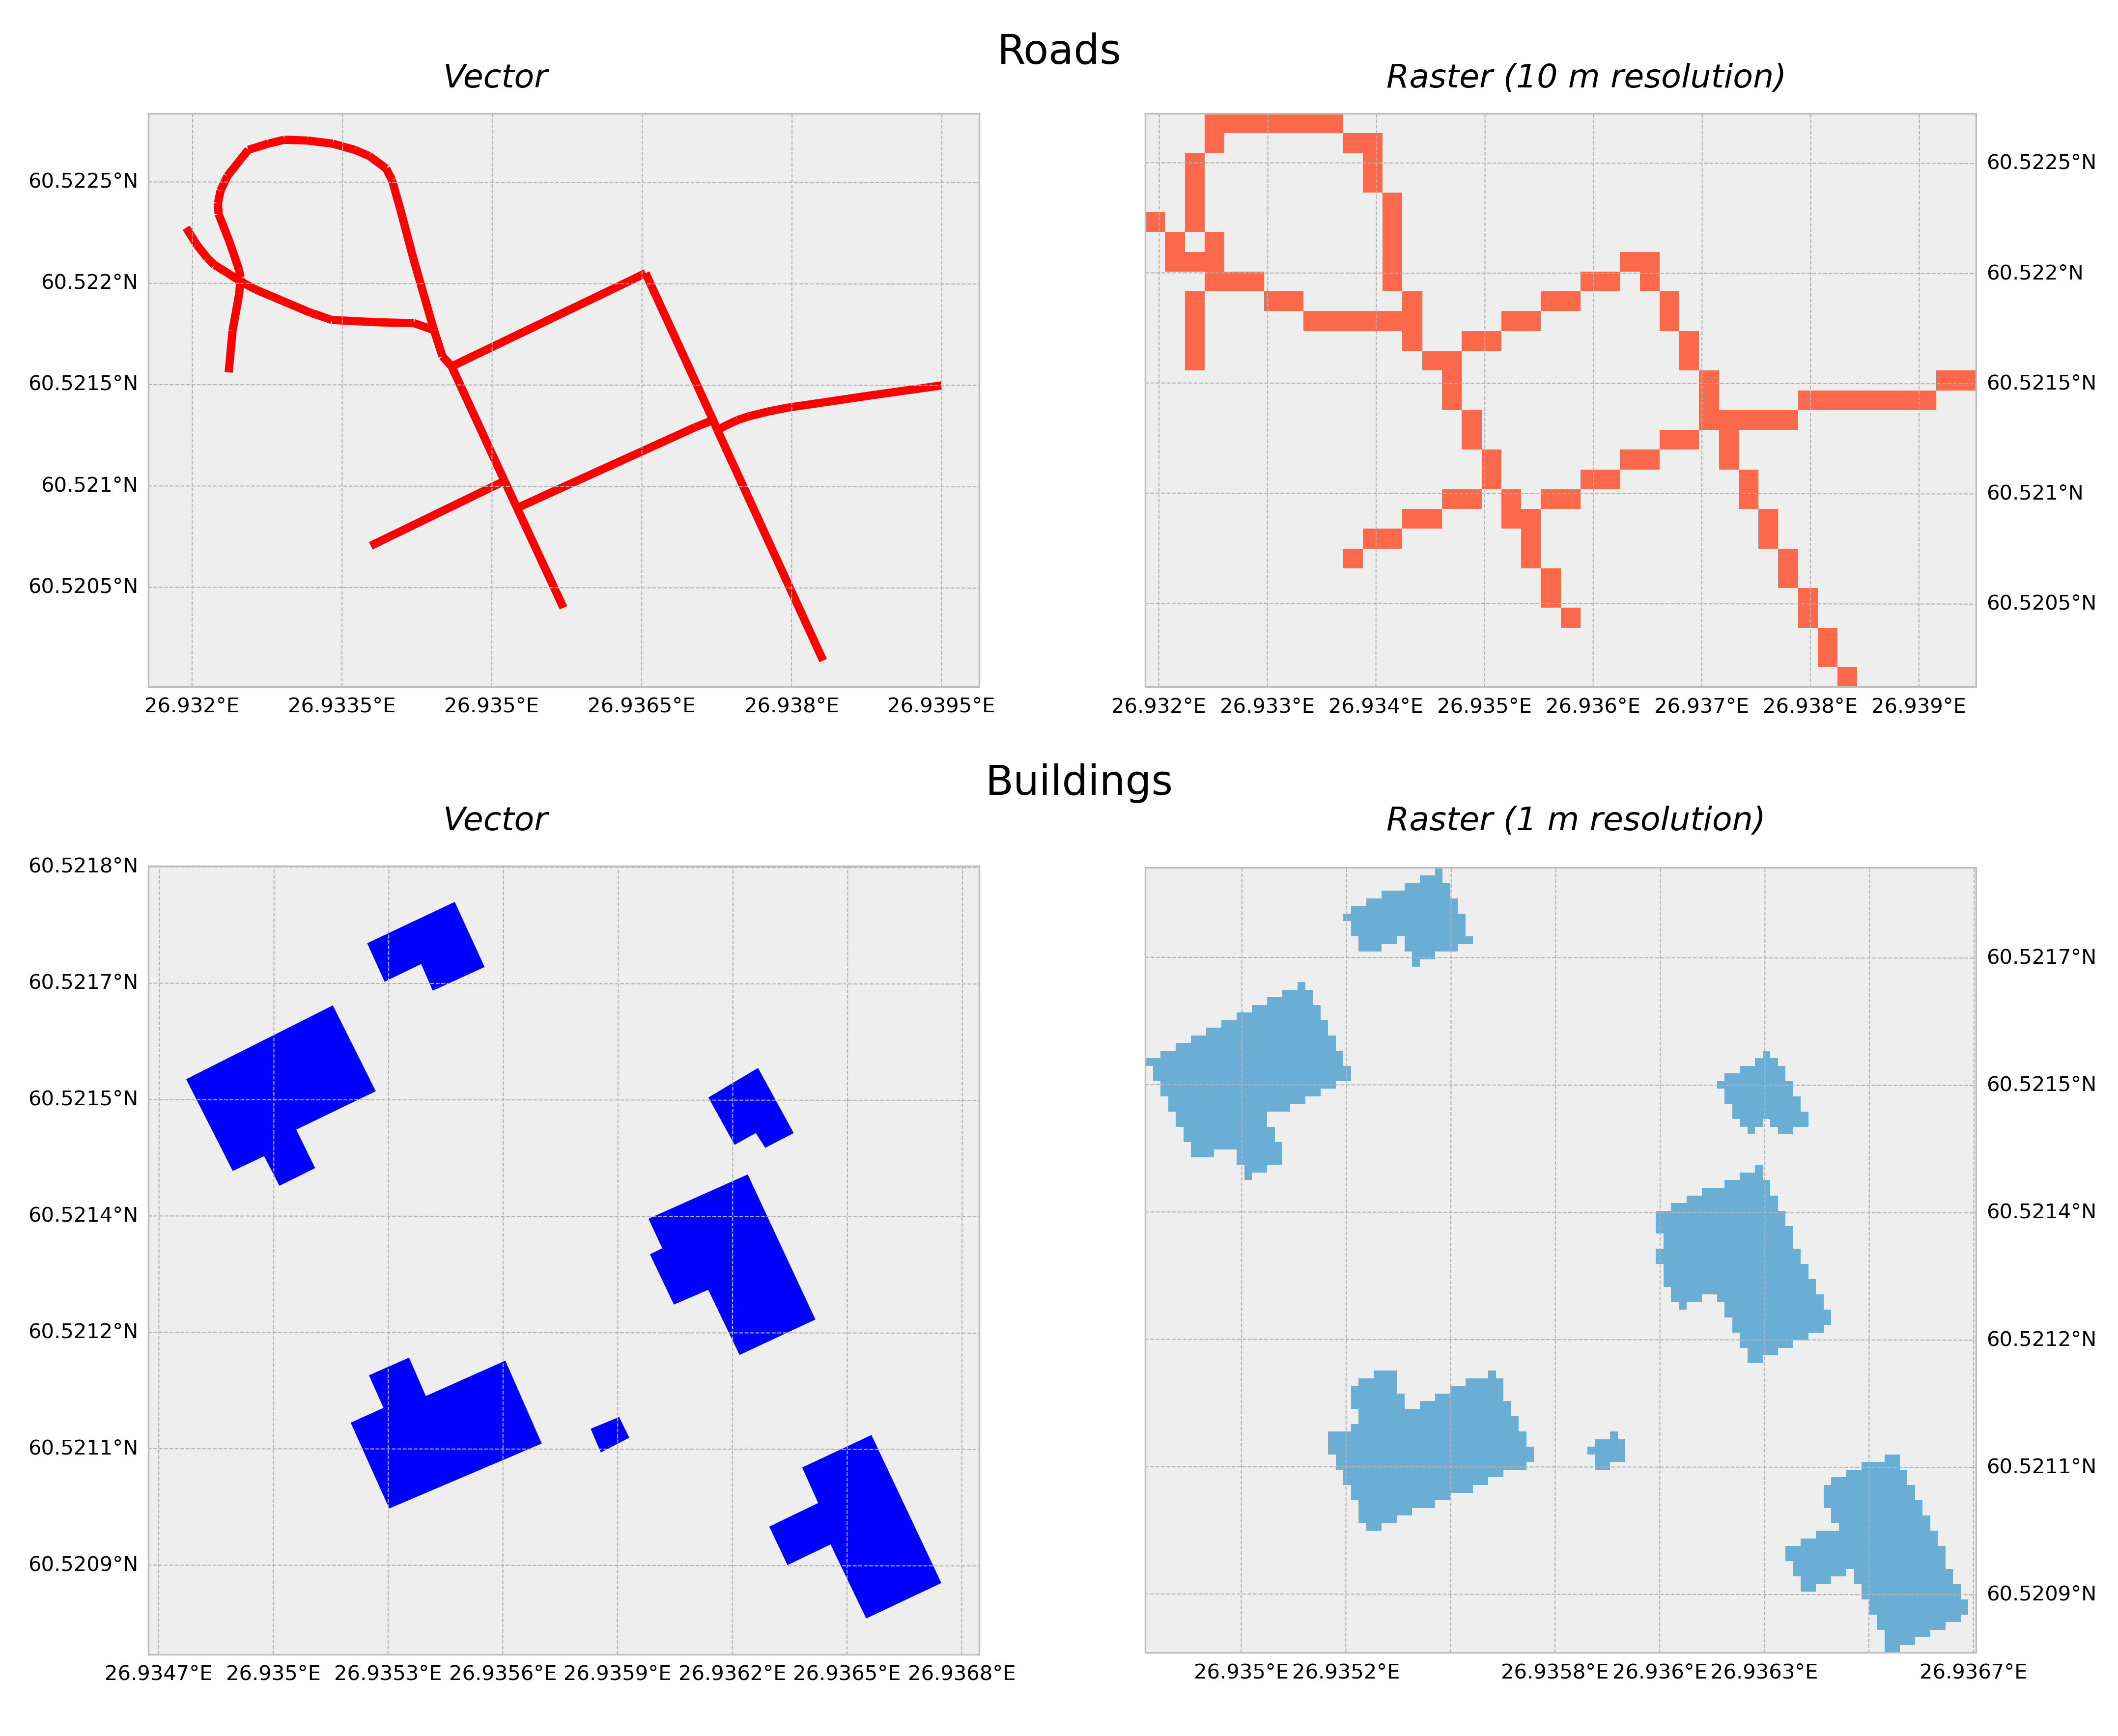

In [2]:
Image("https://pythongis.org/_images/vector_vs_raster.png", height = 800, width = 800)

### Vector Data

#### Basics

Vector data is like a connect-the-dots drawing. All the complex geometry types in Vector data are created by joining multiple points together. 

- Points data (your current location on a map)
- Polylines data (your bike route from home to work)
- Polygons data (the building outline as represented in a computer)

Other geometry types : MultiPoint, MultiLineString, MultiPolygon, Curve, Surface, GeometryCollection. 

In [104]:
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

In [4]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [5]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [ ]:
## Converting population estimates to millions

world['POP_EST'] = world.POP_EST / 1e6

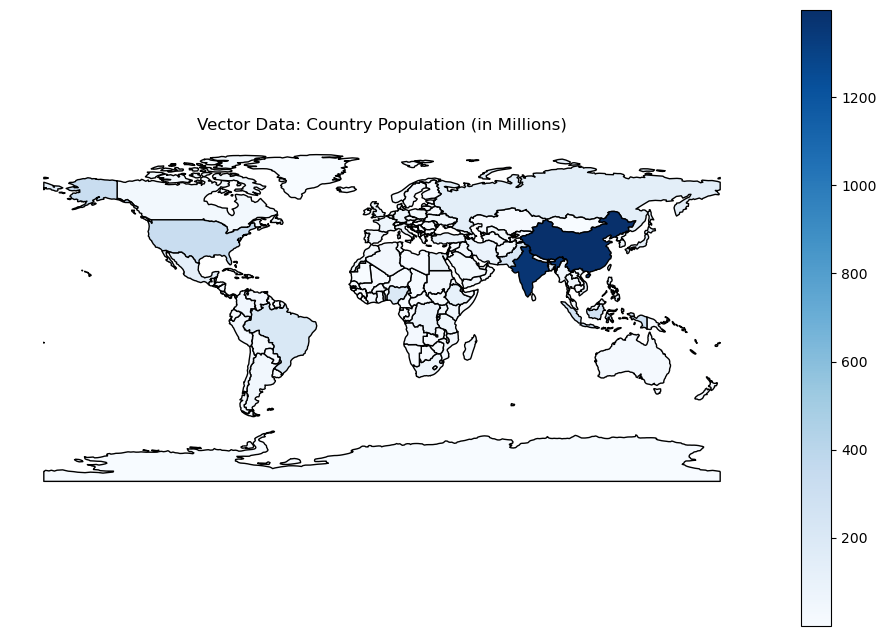

In [11]:
ax = world.plot(column = 'POP_EST', figsize = (12,8), legend=True, cmap="Blues", edgecolor='k')
ax.axis('off')
ax.set_title("Vector Data: Country Population (in Millions)");

In [30]:
## what makes up the geometry object?

str(world[world.ADMIN == 'Spain'].geometry.iloc[0])

'POLYGON ((-7.453725551778092 37.09778758396607, -7.537105475281024 37.42890432387624, -7.166507941099865 37.803894354802225, -7.029281175148796 38.07576406508977, -7.374092169616318 38.37305858006492, -7.098036668313128 39.03007274022379, -7.498632371439726 39.62957103124181, -7.066591559263529 39.711891587882775, -7.026413133156595 40.184524237624245, -6.864019944679385 40.33087189387483, -6.851126674822552 41.11108266861753, -6.389087693700915 41.381815497394655, -6.6686055159676565 41.883386949219584, -7.251308966490824 41.91834605566505, -7.422512986673795 41.79207469335984, -8.013174607769912 41.790886135417125, -8.263856980817792 42.28046865495034, -8.67194576662672 42.13468943945496, -9.034817674180246 41.880570583659676, -8.984433152695672 42.59277517350627, -9.392883673530648 43.0266246608127, -7.97818966310831 43.74833771420099, -6.754491746436756 43.567909450853925, -5.411886359061597 43.57423981380968, -4.3478427799557835 43.40344920508504, -3.5175317041060907 43.455900783

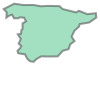

In [34]:
## how gos the geometry object look like?

world[world.ADMIN == 'Spain'].geometry.iloc[0]

In [35]:
## Geometry objects are created by a library called 'shapely'

type(world[world.ADMIN == 'Spain'].geometry.iloc[0]) 

shapely.geometry.polygon.Polygon

#### Vector File Types and Python Packages

- Shapefile (its a collection of 3 mandatory files that consists of shapefile, database file and index file). It could also include projection file and spatial index file. 
- Geojson (represents shapefile like data in json format)
- Geopackage (stores collection of layers where every layer can be a shapefile)
- CSV (a shapefile can be translated to a simple CSV file)

Packages
- Geopandas (Pandas equivalent but with a geospatial attribute extension, including I/O and data manipulation) 
- Shapely (Handles all the operations based on a shape i.e. spatial operations and geometry manipulation) 

#### Vector Analysis

We can use geometry objects to perfom a number of spatial operations. In our project, we're more likely to aggregate subnational data at country level. Geopandas provides a simple function to merge different datasets together (similar to Pandas' merge). 

There are multiple operations (predicate in Geopandas) that we can use depending on our task. 

The common operations are :

- intersects (the default option)
- contains
- covered_by
- covers
- crosses
- overlaps
- touches
- within

In [105]:
states = gpd.read_file("data/ne_10m_admin_1_states_provinces.shp")
states.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 states provinces,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20012 -32.4472, -58.20011 -32.44..."
2,Admin-1 states provinces,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,Admin-1 states provinces,6,MYS-1186,1186,MY-12,None,MY,5,Sabah,North Borneo,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,Admin-1 states provinces,3,CHL-2694,2694,CL-AP,None,CL,1,Arica y Parinacota,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."


In [ ]:
merged_df = gpd.sjoin(
    world , 
    states[['adm0_a3', 'name_en', 'geometry']], 
    how='left', 
    predicate='overlaps',
    lsuffix='_state', 
    rsuffix='_country'
)

In [ ]:
merged_df[merged_df.adm0_a3 == 'IND'].shape

In [192]:
## removing areas from neighboring countries since the boundaries are roughly mapped
 
merged_df = merged_df[merged_df['adm0_a3'] == merged_df['ISO_A3']]

In [193]:
merged_df[merged_df.adm0_a3 == 'IND'].shape

(27, 172)

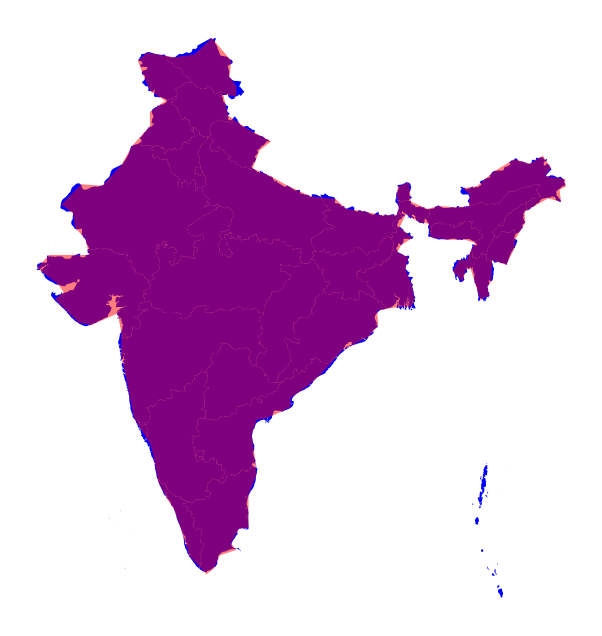

In [188]:
ax = states[states.adm0_a3 == 'IND'].plot(color = 'blue', figsize = (12,8))
world[world.ISO_A3 == 'IND'].plot(ax =ax, alpha = 0.5, color = 'red')
ax.set_axis_off()

In [106]:
## Pandas groupby equivalent in Geopandas is "dissolve"

states_diss = states.dissolve(by = 'adm0_a3', aggfunc = "sum")

In [107]:
states_diss.head()

,geometry,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC
adm0_a3,,,,,,,,,,,,,,,,,,,,,
ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",Admin-1 states provinces,10,ABW-5150,5150,AW-X01~,0,AW,3,Aruba,...,0,0,0,0,0,0,0,0,0,0
AFG,"POLYGON ((61.21562 30.23971, 61.27216 30.29831...",Admin-1 states provincesAdmin-1 states provinc...,170,AFG-1760AFG-1765AFG-1763AFG-1744AFG-1746AFG-17...,61412,AF-BDSAF-TAKAF-KDZAF-BALAF-JOWAF-FYBAF-BDGAF-H...,0,AFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAFAF...,34,BadakhshanTakharKunduzBalkhJawzjanFaryabBadghi...,...,0,0,0,0,0,0,0,0,0,0
AGO,"MULTIPOLYGON (((11.71579 -16.68501, 11.70197 -...",Admin-1 states provincesAdmin-1 states provinc...,72,AGO-1885AGO-1888AGO-1892AGO-1893AGO-1889AGO-18...,33903,AO-CABAO-CCUAO-MOXAO-NAMAO-CNNAO-ZAIAO-UIGAO-L...,0,AOAOAOAOAOAOAOAOAOAOAOAOAOAOAOAOAOAO,22,CabindaCuando CubangoMoxicoNamibeCuneneZaireUí...,...,0,0,0,0,0,0,0,0,0,0
AIA,"MULTIPOLYGON (((-63.14208 18.19815, -63.13435 ...",Admin-1 states provincesAdmin-1 states provinc...,151,AIA-5115AIA-5123AIA-5119AIA-5126AIA-5118AIA-51...,81689,AI-X02~AI-X10~AI-X06~AI-X13~AI-X05~AI-X07~AI-X...,"http://en.wikipedia.org/wiki/East_End,_Anguill...",AIAIAIAIAIAIAIAIAIAIAIAIAIAIAI,20,East EndStoney GroundNorth SideThe ValleyNorth...,...,0,0,0,0,0,0,0,0,0,0
ALB,"POLYGON ((20.28003 39.80398, 20.27301 39.79649...",Admin-1 states provincesAdmin-1 states provinc...,96,ALB-1526ALB-1502ALB-1521ALB-1524ALB-1525ALB-15...,18169,AL-09AL-07AL-06AL-03AL-05AL-12AL-10AL-04AL-11A...,0,ALALALALALALALALALALALAL,12,DibërKukësKorçëElbasanGjirokastërVlorëShkodërF...,...,0,0,0,0,0,0,0,0,0,0


Additionally, you can also 
- measure distance between two spatial objects
- overlay geometry on top of each other and get a union, intersection or difference of them
- calculate area or length of polygons and polylines
- create buffers around a geometry object

### Projection

Converting Earth's sphere into flat maps requires some specialized work. **Projections** are methematical methods to "flatten" 3D surface on the a flat surface. 

But every Projection intriduces some distortions in the data. You would need assess the trade-offs and choose accordingly

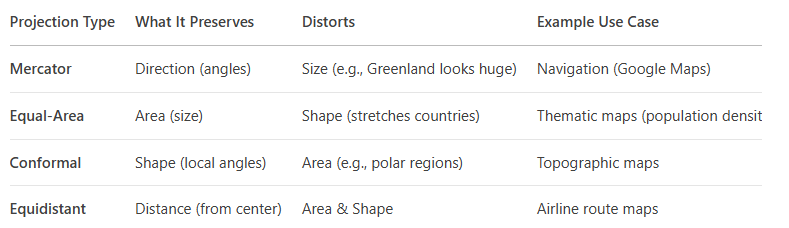

In [54]:
## How to check geodataframe's CRS?

world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can reproject the data to different coordinate systems, to align different data files OR to perform spatial operations.

Use [epsg.io](https://epsg.io/) and play around with different coordinate reference systems. 

In [59]:
world_rpj = world.to_crs("EPSG:32633")

In [60]:
world_rpj.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

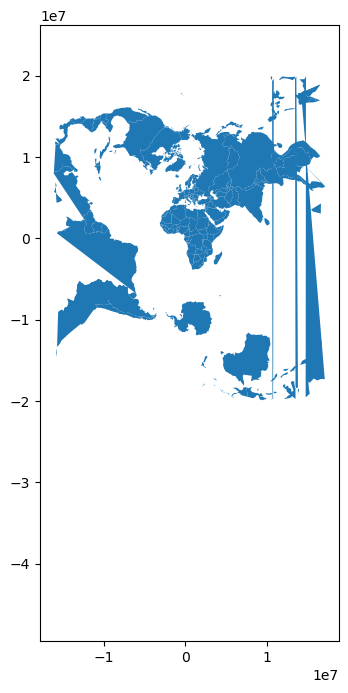

In [61]:
world_rpj.plot(figsize = (12, 8))

In [62]:
world_rpj = world.to_crs("EPSG:3857")

In [63]:
world_rpj.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

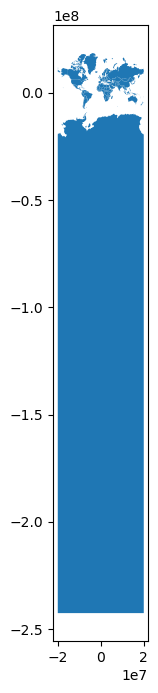

In [64]:
world_rpj.plot(figsize = (12, 8))

### Raster Data

Data is represented as arrays of cells, also called as pixels, to represent real-world objects. The photographs you take from your camera, are the most common types of raster data. 

That data is stored in Red, Green and Blue colors (RGB) as separate layers, called bands for each color. 

In a similar way we can capture information from physical world in these pixels. For instance, an elevation raster will have a value for each pixel representing that pixel's elevation in the real world. 


Common concepts while using raster data:

- Spatial resolution - the size of the single pixel
- Cooridnate reference system (CRS)

Additional information you may receive based on the intrument used to capture the data:
- Temporal resolution - how frequently the data is captured from the same area of the Earth
- Spectral resolution - the number and location of spectral bands in the electromagnetic spectrum
- Spatial extent - how large area of the world a single image represents

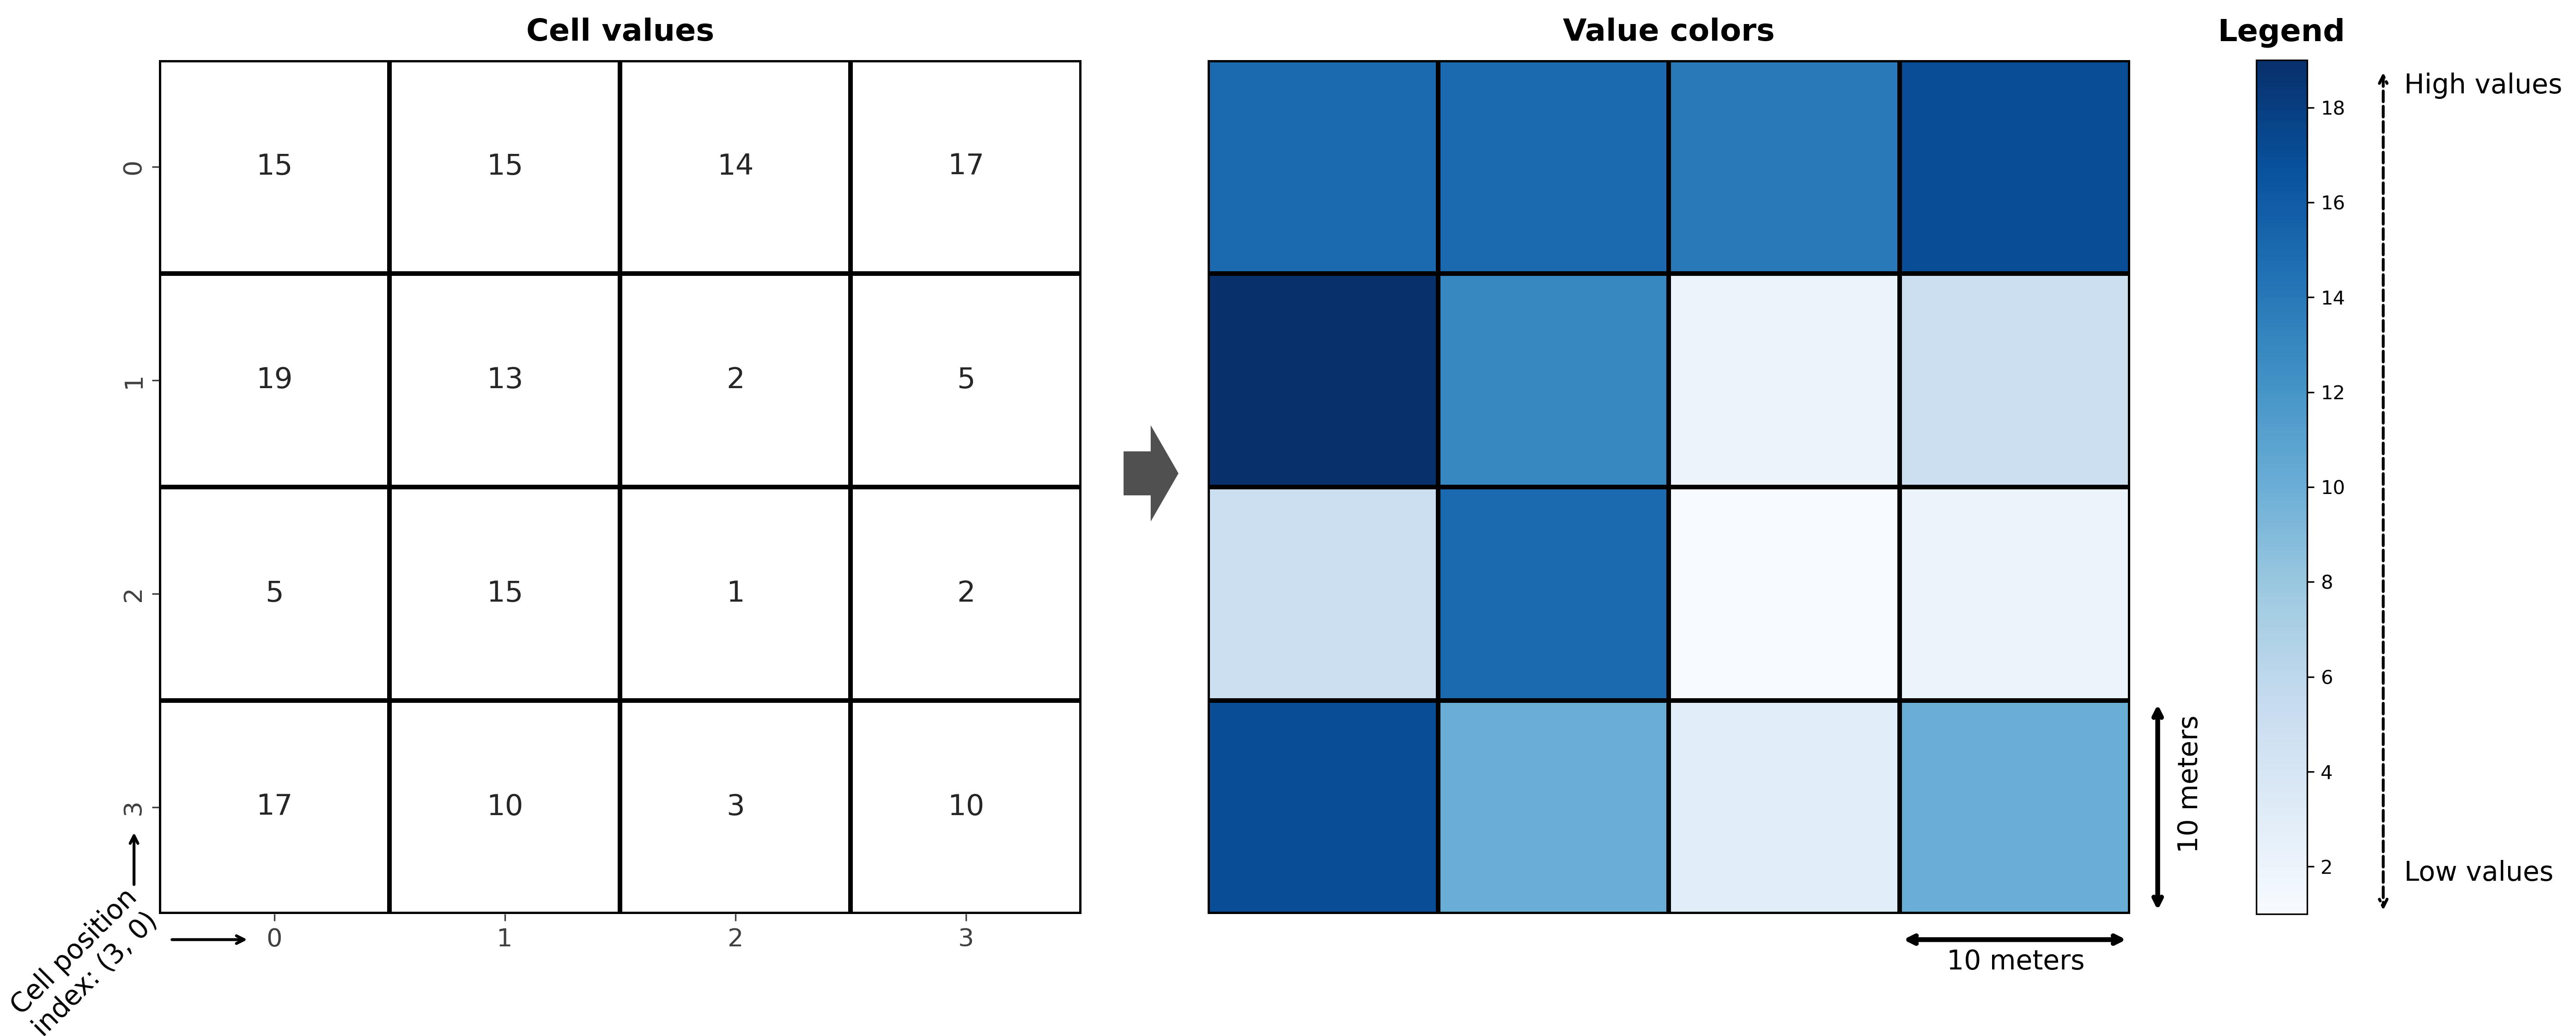

In [67]:
Image("https://pythongis.org/_images/raster_data_model.png", height = 800, width = 800)

In [108]:
with rio.open("data/cub_pop_2025_CN_1km_R2024B_UA_v1.tif") as src:
    data = src.read(1)  # Read the first band
    bounds = src.bounds
    resolution = src.res
    nodata_value = src.nodata

if nodata_value is not None:
    masked_array = np.ma.masked_equal(data, nodata_value)
    print(f"Number of masked (nodata) pixels: {np.ma.count_masked(masked_array)}")
else:
    print("No nodata value defined in the raster's metadata.")

print(f"Raster bounds: {bounds}")
print(f"Pixel size (x, y): {resolution}")
print(f"Min population: {np.min(masked_array):.1f}m")
print(f"Max population: {np.max(masked_array):.1f}m")

# print(f"Min population: {np.min(data):.1f}m")
# print(f"Max population: {np.max(data):.1f}m")

Number of masked (nodata) pixels: 458828
Raster bounds: BoundingBox(left=-84.95833371349998, bottom=19.8250002567, right=-74.12500042349998, top=23.2833335762)
Pixel size (x, y): (0.0083333333, 0.0083333333)
Min population: 0.0m
Max population: 14414.8m


In [ ]:
## All the metadata included in raster file

src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -99999.0,
 'width': 1300,
 'height': 415,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0083333333, 0.0, -84.95833371349998,
        0.0, -0.0083333333, 23.2833335762)}

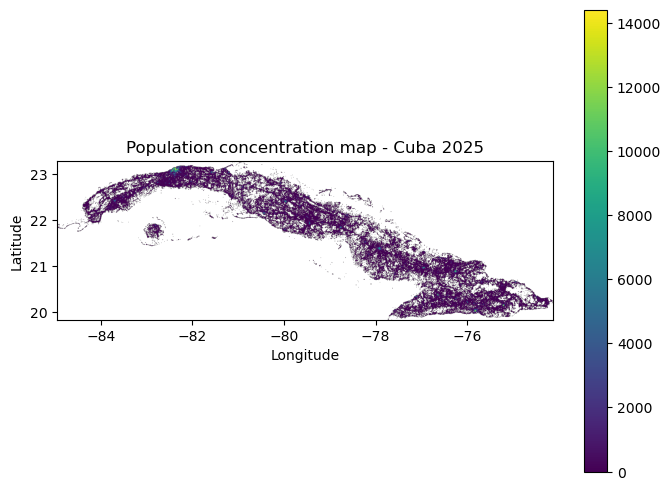

In [79]:
plt.figure(figsize=(8, 6))
im = plt.imshow(masked_array, cmap="viridis", extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
plt.colorbar(im, label="")
plt.title("Population concentration map - Cuba 2025")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [86]:
## What does the data look like?

data

array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       ...,
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],
      dtype=float32)

In [87]:
## regular numpy operations will work on this data 
## Make sure not to delete array elements, since they're mapped to spatial objects at the backend

data.shape

(415, 1300)

In [88]:
## Projection of the raster

src.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

#### Raster Analysis

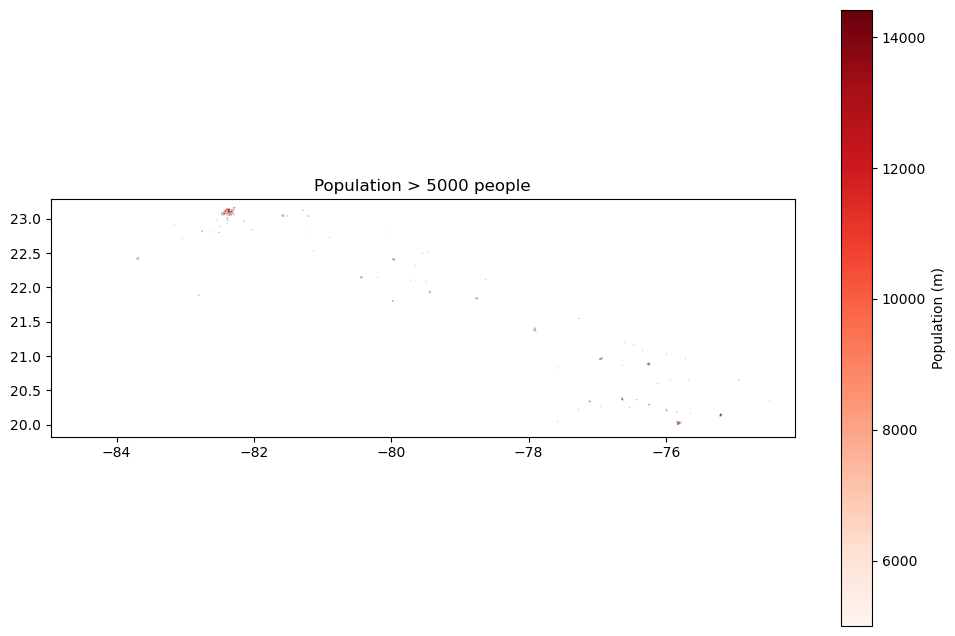

In [92]:
## Identifying areas that have population of more than 5000 people per pixel

high_pop = np.where(data > 5000, data, np.nan)

# Plot high-elevation zones
plt.figure(figsize=(12, 8))
plt.imshow(high_pop, cmap="Reds", extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
plt.title("Population > 5000 people")
plt.colorbar(label="Population (m)")
plt.show()

#### Reprojecting a raster

In [93]:
from rasterio.warp import calculate_default_transform, reproject

# Reproject to Web Mercator
dst_crs = "EPSG:3857"
with rio.open("data/cub_pop_2025_CN_1km_R2024B_UA_v1.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    reprojected_data = np.zeros((height, width), dtype=np.float32)
    
    reproject(
        source=rio.band(src, 1),
        destination=reprojected_data,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=dst_crs,
        resampling=rio.enums.Resampling.bilinear
    )

In [96]:
with rio.open(
    "data/cub_pop_3857.tif",
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype=reprojected_data.dtype,
    crs=dst_crs,
    transform=transform,
) as dst:
    dst.write(reprojected_data, 1)

In [97]:
with rio.open("data/cub_pop_3857.tif") as src:
    data = src.read(1)  # Read the first band
    bounds = src.bounds
    resolution = src.res
    nodata_value = src.nodata

if nodata_value is not None:
    masked_array = np.ma.masked_equal(data, nodata_value)
    print(f"Number of masked (nodata) pixels: {np.ma.count_masked(masked_array)}")
else:
    print("No nodata value defined in the raster's metadata.")

print(f"Raster bounds: {bounds}")
print(f"Pixel size (x, y): {resolution}")
print(f"Min population: {np.min(masked_array):.1f}m")
print(f"Max population: {np.max(masked_array):.1f}m")

# print(f"Min population: {np.min(data):.1f}m")
# print(f"Max population: {np.max(data):.1f}m")

No nodata value defined in the raster's metadata.
Raster bounds: BoundingBox(left=-9457518.447631825, bottom=2252401.642990011, right=-8251271.140745614, top=2666319.1929130093)
Pixel size (x, y): (934.3511284943538, 934.3511284943538)
Min population: 0.0m
Max population: 14414.8m


In [98]:
src.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [99]:
src.transform

Affine(934.3511284943538, 0.0, -9457518.447631825,
       0.0, -934.3511284943538, 2666319.1929130093)

### APIs

#### Vector Data APIs

##### Geoserver based services (Non-ESRI)

In [8]:
## GetCapabilities

url = "https://gs-stable.geo-solutions.it/geoserver/topp/ows"
params = {
    'service': 'WFS',
    'version': '1.0.0',
    'request': 'GetCapabilities',
    'outputFormat': 'application/json'
}

In [9]:
response = requests.get(url, params=params, verify = False)

In [ ]:

parsed = xml.dom.minidom.parseString(response.text)

new_xml = parsed.toprettyxml()
print(new_xml)


<?xml version="1.0" ?>
<WFS_Capabilities xmlns="http://www.opengis.net/wfs" xmlns:topp="http://www.openplans.org/topp" xmlns:ogc="http://www.opengis.net/ogc" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.0.0" xsi:schemaLocation="http://www.opengis.net/wfs https://gs-stable.geosolutionsgroup.com/geoserver/schemas/wfs/1.0.0/WFS-capabilities.xsd">
	<Service>
		<Name>WFS</Name>
		<Title/>
		<Abstract/>
		<Keywords/>
		<OnlineResource>GeoSolutions</OnlineResource>
		<Fees/>
		<AccessConstraints/>
	</Service>
	<Capability>
		<Request>
			<GetCapabilities>
				<DCPType>
					<HTTP>
						<Get onlineResource="https://gs-stable.geosolutionsgroup.com/geoserver/topp/wfs?request=GetCapabilities"/>
					</HTTP>
				</DCPType>
				<DCPType>
					<HTTP>
						<Post onlineResource="https://gs-stable.geosolutionsgroup.com/geoserver/topp/wfs"/>
					</HTTP>
				</DCPType>
			</GetCapabilities>
			<DescribeFeatureType>
				<SchemaDescriptionLanguage>
					<XMLSCHEMA/>
				</SchemaDescr

In [ ]:
## Querying the data

params = {
    'service': 'WFS',
    'version': '1.0.0',
    'request': 'GetFeature',
    'typeName': 'topp:states', ##workspace:layer
    'outputFormat': 'application/json'
}

try:
    response = requests.get(url, params=params, verify = False)

    if response.status_code == 200:
        data = response.json()

        #print(json.dumps(data, indent=2))

        if data['features']:
            for feat in data['features']:
                print(f"State Name: {feat['properties'].get('STATE_NAME')}")
                print(f"Total Population: {feat['properties'].get('SAMP_POP')}")

    else:
        print(f"Error: Received status code {response.status_code}")
        print(response.text)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

State Name: Illinois
Total Population: 1747776
State Name: District of Columbia
Total Population: 72696
State Name: Delaware
Total Population: 102776
State Name: West Virginia
Total Population: 317564
State Name: Maryland
Total Population: 684773
State Name: Colorado
Total Population: 512677
State Name: Kentucky
Total Population: 646517
State Name: Kansas
Total Population: 453411
State Name: Virginia
Total Population: 898089
State Name: Missouri
Total Population: 864999
State Name: Arizona
Total Population: 468178
State Name: Oklahoma
Total Population: 528722
State Name: North Carolina
Total Population: 1013599
State Name: Tennessee
Total Population: 736654
State Name: Texas
Total Population: 2487642
State Name: New Mexico
Total Population: 237629
State Name: Alabama
Total Population: 630032
State Name: Mississippi
Total Population: 399625
State Name: Georgia
Total Population: 935083
State Name: South Carolina
Total Population: 506464
State Name: Arkansas
Total Population: 414226
State

In [ ]:
## Filter by Attribute

params = {
    'service': 'WFS',
    'version': '1.0.0',
    'request': 'GetFeature',
    'typeName': 'topp:states',
    'outputFormat': 'application/json',
    'cql_filter': "STATE_NAME = 'California'"
}

try:
    response = requests.get(url, params=params, verify = False)

    if response.status_code == 200:
        data = response.json()

        #print(json.dumps(data, indent=2))

        if data['features']:
            for feat in data['features']:
                print(f"State Name: {feat['properties'].get('STATE_NAME')}")
                print(f"Total Population: {feat['properties'].get('SAMP_POP')}")

    else:
        print(f"Error: Received status code {response.status_code}")
        print(response.text)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

State Name: California
Total Population: 3792553


In [ ]:
## Filter by Spatial query

# Format: min_lon, min_lat, max_lon, max_lat, CRS
bounding_box = "-110,36,-108,38,EPSG:4326"

params = {
    'service': 'WFS',
    'version': '1.0.0',
    'request': 'GetFeature',
    'typeName': 'topp:states',
    'outputFormat': 'application/json',
    'bbox': bounding_box
}

try:
    response = requests.get(url, params=params, verify = False)

    if response.status_code == 200:
        data = response.json()

        if data['features']:
            for feat in data['features']:
                print(f"State Name: {feat['properties'].get('STATE_NAME')}")
                print(f"Total Population: {feat['properties'].get('SAMP_POP')}")

    else:
        print(f"Error: Received status code {response.status_code}")
        print(response.text)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

State Name: Colorado
Total Population: 512677
State Name: Arizona
Total Population: 468178
State Name: New Mexico
Total Population: 237629
State Name: Utah
Total Population: 304592


In [24]:
## Spatial operation

point_wkt = "POINT(-77.063600 38.898258)"

cql_spatial_filter = f"INTERSECTS(the_geom, {point_wkt})" ##PostGIS like query

params = {
    'service': 'WFS',
    'version': '1.0.0',
    'request': 'GetFeature',
    'typeName': 'topp:states',
    'outputFormat': 'application/json',
    'cql_filter': cql_spatial_filter
}

try:
    response = requests.get(url, params=params, verify = False)

    if response.status_code == 200:
        data = response.json()

        if data['features']:
            for feat in data['features']:
                print(f"State Name: {feat['properties'].get('STATE_NAME')}")
                print(f"Total Population: {feat['properties'].get('SAMP_POP')}")

    else:
        print(f"Error: Received status code {response.status_code}")
        print(response.text)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

State Name: District of Columbia
Total Population: 72696


##### ESRI WFS

World Bank Official Country Polygons

https://services.arcgis.com/iQ1dY19aHwbSDYIF/ArcGIS/rest/services/World_Bank_Official_Boundaries_World_Country_Polygons_(Very_High_Definition)/FeatureServer/0

In [69]:
## Filter by attribute

def get_boundaries(params):
    """
    This function queries World Bank official boundary dataset and returns 
    country boundary based on attribute and value passed to the function. 
    
    Input:
    attr: One of the attributes of database
    val : Value corresponding to the attribute
    
    Complete list of attributes can be found here: 
    https://services.arcgis.com/iQ1dY19aHwbSDYIF/ArcGIS/rest/services/World_Bank_Official_Boundaries_World_Country_Polygons_(Very_High_Definition)/FeatureServer/0
    
    Returns:
    A dataframe with features and geometry returned by the API. 
    """
    
    url = ''.join(['https://services.arcgis.com/iQ1dY19aHwbSDYIF/ArcGIS/rest/services/',
            'World_Bank_Official_Boundaries_World_Country_Polygons_(Very_High_Definition)/FeatureServer/0/query?'])

    result = requests.get(url, params = params, verify = False)

    if result.status_code == 200:
        try:
            res = result.json()
            df = pd.DataFrame.from_dict(res['features'][0]).T[:-1]
            geom_lis = []
            for i in range(len(res['features'][0]['geometry']['rings'])):
                geom_lis.append(shapely.geometry.Polygon(res['features'][0]['geometry']['rings'][i]))
            geom = shapely.ops.unary_union(geom_lis)
            df.loc['attributes', 'rings'] = geom
            return df
        except Exception as e:
            return e.args[0]

In [ ]:
## Query by attribute
params = {
        "where" : "ISO_A3='PHL'",
        "f" : "pjson",
        "returnGeometry" : True,
        "outFields" : "*",
        "outSR" : 4326
    }
df = get_boundaries(params)
gdf = gpd.GeoDataFrame(df, geometry = 'rings')

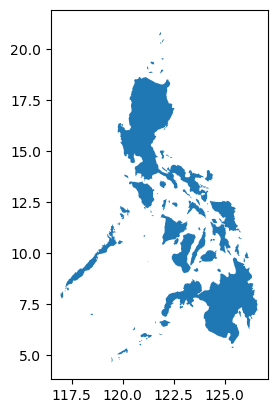

In [71]:
gdf.plot();

In [ ]:
## Query by Spatial object
params = {
    'where': '1=1',  # Get all features
    'geometry': '27.07,27.26,33.97,27.26',  # xmin,ymin,xmax,ymax
    'geometryType': 'esriGeometryEnvelope',
    'spatialRel': 'esriSpatialRelIntersects',
    'outFields': '*',
    'returnGeometry': True,
    'f': 'pjson',  # Response format
    "inSR" : 4326, #Input spatial reference
    'outSR': 4326  # Output spatial reference
}

df = get_boundaries(params)
gdf = gpd.GeoDataFrame(df, geometry = 'rings')

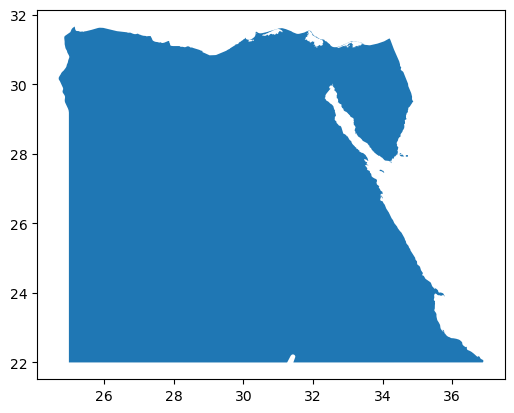

In [73]:
gdf.plot();

#### Raster Services

##### COGs

COGs (Cloud-Optimized GeoTIFFs) are like online-friendly photo files that let you quickly access just the parts of a map image you need, without downloading the whole thing.

In [74]:
from rio_tiler.io import COGReader
from rio_tiler.utils import create_cutline
from rasterio.features import bounds as featureBounds
%matplotlib inline

In [76]:
## Geojson for a polygon
## Malawi

feat ={
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              33.64022163514227,
              -13.095832877158898
            ],
            [
              33.64022163514227,
              -13.509532545665095
            ],
            [
              34.134782313766124,
              -13.509532545665095
            ],
            [
              34.134782313766124,
              -13.095832877158898
            ],
            [
              33.64022163514227,
              -13.095832877158898
            ]
          ]
        ]
      }
    }

In [ ]:
# Get BBOX of the polygon
bbox = featureBounds(feat)

# Use COGReader to open and read the dataset
with COGReader("https://datacatalogfiles.worldbank.org/ddh-published/0037935/1/DR0046011/mwi_maize_mask_cog_2016.tif") as cog:
    # Create WTT Cutline
    cutline = create_cutline(cog.dataset, feat, geometry_crs="epsg:4326")

    # Read part of the data (bbox) and use the cutline to mask the data
    data_, mask_ = cog.part(bbox, vrt_options={'cutline': cutline})

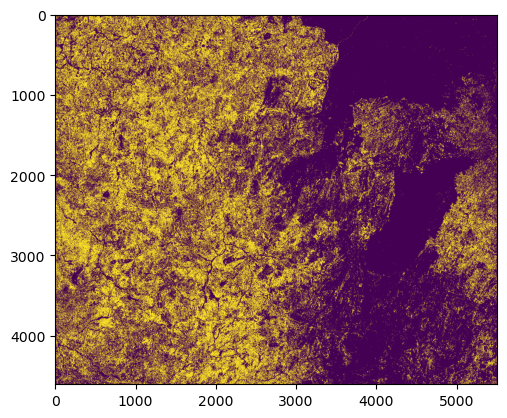

In [79]:
plt.imshow(data_[0,:,:])

In [81]:
data_.shape

(1, 4605, 5505)

##### ImageServices

In [ ]:
import rasterio
from rasterio.io import MemoryFile
from io import BytesIO

def get_raster_subset_as_array(image_server_url, 
                               bbox, 
                               bbox_sr=4326, 
                               width=1000, 
                               height=1000,
                               filters = 'OBJECTID=1'):
    """
    Fetch raster subset from ImageServer and return as NumPy array
    
    Args:
        image_server_url: URL to ImageServer export endpoint
        bbox: Tuple of (xmin, ymin, xmax, ymax)
        bbox_sr: Spatial reference of bbox (default: 4326 for WGS84)
        width, height: Output dimensions in pixels
    
    Returns:
        NumPy array containing raster data
    """

    export_url = f"{image_server_url}/exportImage"
    
    # Prepare parameters
    params = {
        "bbox": f"{bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}",
        "bboxSR": bbox_sr,
        "size": f"{width},{height}",
        "format": "tiff",
        "pixelType": "F32",  # Adjust if you need different pixel type
        "f": "Image",
        "noDataInterpretation": "esriNoDataMatchAny",
        "interpolation": "RSP_BilinearInterpolation",
    }
    
    # Make request
    #response = requests.get(export_url, params=params)
    #response.raise_for_status()
    
    # Load into memory and open with rasterio
    try:
        response = requests.get(export_url, params=params, verify=False)
        response.raise_for_status()
        
        try:
            with MemoryFile(response.content) as memfile:
                with memfile.open() as dataset:
                    return dataset.read()
        
        except rasterio.errors.RasterioIOError:
            with BytesIO(response.content) as buffer:
                with rasterio.open(buffer) as dataset:
                    return dataset.read()
    
    except requests.exceptions.RequestException as e:
        raise ValueError(f"Request failed: {str(e)}")
    except Exception as e:
        raise ValueError(f"Failed to read raster: {str(e)}")
    
    return array



In [ ]:
image_server_url = "https://sampleserver6.arcgisonline.com/arcgis/rest/services/Toronto/ImageServer"

bbox = (-79.43016, 43.64691, -79.34530, 43.69558)  # xmin, ymin, xmax, ymax 

raster_array = get_raster_subset_as_array(image_server_url, bbox)
print(f"Array shape: {raster_array.shape}")
print(f"Array dtype: {raster_array.dtype}")

Array shape: (4, 1000, 1000)
Array dtype: float32


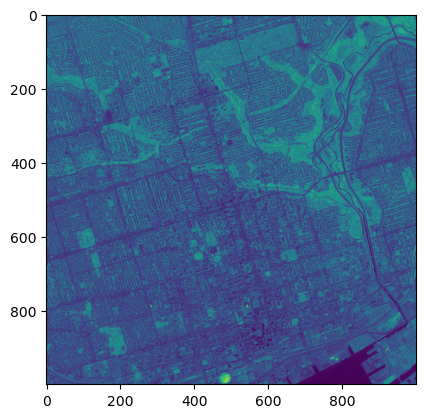

In [103]:
plt.imshow(raster_array[3,:,:])